# Example 02: CIFAR-10 Demo

In [1]:
import sys
sys.path.append('./../')
import matplotlib
%matplotlib inline
import visualisation

/home/alex/anaconda2/envs/ANT/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## (i) Train an ANT on the IoT image recognition dataset
From the code directory, run the following command to train an ANT:

```bash
python tree.py --dataset iot \ # dataset
               --experiment demo1 --subexperiment ant_iot \ # experiment names
               --batch-size 256 --epochs_patience 5 \ # training
               --epochs_node 200 --epochs_finetune 300 \
               --scheduler step_lr --augmentation_on \
               -t_ver 5 -t_k 3 -t_ngf 96 \ # transformer module config
               -r_ver 3 -r_ngf 48 -r_k 3 \ # router module config 
               -s_ver 6 \ # solver module config 
               --maxdepth 10 --batch_norm \ # other model config 
               --num_workers 0 --seed 0 # miscellaneous 
```

It takes less than 3 hours on a single Titan X GPU.

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

0
0
ant_iot: test accuracy = 50.8166969147


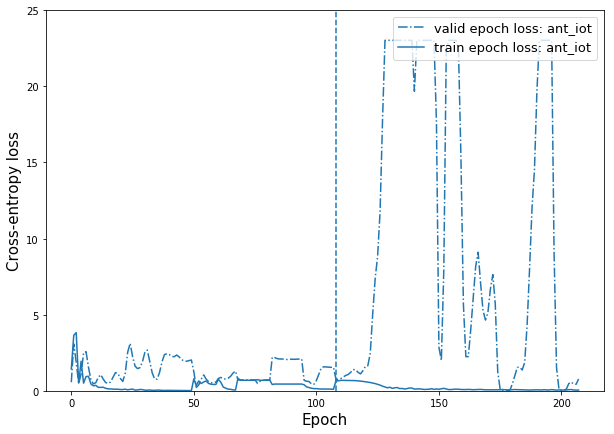

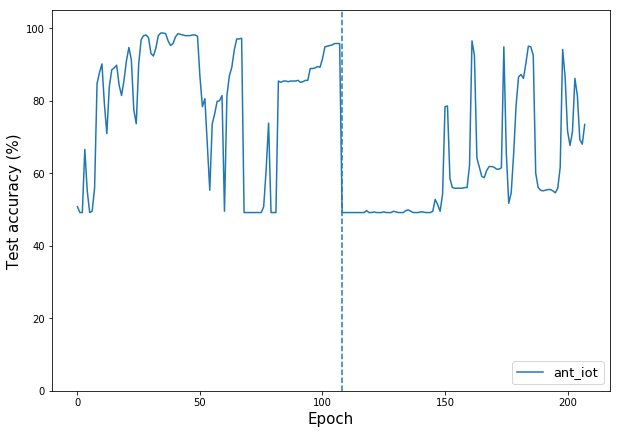

In [2]:
exp_dir = './../experiments/iot/demo8/'
models_list = ['ant_iot']

records_file_list = [exp_dir + model_name + '/checkpoints/records.json' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

visualisation.plot_performance(records_file_list, models_list, ymax = 25.0, figsize=(10,7), finetune_position=True)
visualisation.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=105, finetune_position=True)

## (iii) Compute model size

In [3]:
_ = visualisation.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: ant_iot
Number of parameters summary:
    Total: 302069 
    Max per branch: 225267 
    Min per branch: 225267 
    Average per branch: 225267.0


## (iv) Visualise the tree structure

In [4]:
fig_dir = exp_dir + 'ant_cifar10' + '/figures/'
visualisation.visualise_treestructures(fig_dir, figsize=(10,20))

OSError: [Errno 2] No such file or directory: './../experiments/iot/demo8/ant_cifar10/figures/'